<a href="https://colab.research.google.com/github/tonysoux/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

Sat Aug  2 09:49:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

!pip install torchmetrics

2.6.0+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
Autonomous driving, control quality and

SyntaxError: invalid syntax (ipython-input-669713998.py, line 1)

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
from torchvision.datasets import MNIST
from torchvision import transforms

train_data=MNIST("data/mnist", train = True, transform=transforms.ToTensor(), download=True)
print(train_data[5000][0].shape)

test_data=MNIST("data/mnist", train = False, transform=transforms.ToTensor(), download=True)
print(test_data)

torch.Size([1, 28, 28])
Dataset MNIST
    Number of datapoints: 10000
    Root location: data/mnist
    Split: Test
    StandardTransform
Transform: ToTensor()


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 6. Visualize at least 5 different samples of the MNIST training dataset.

37542
torch.Size([1, 28, 28])
46067
torch.Size([1, 28, 28])
46876
torch.Size([1, 28, 28])
46414
torch.Size([1, 28, 28])
10026
torch.Size([1, 28, 28])


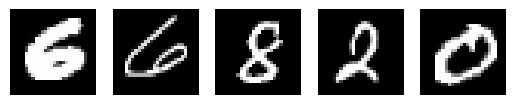

In [6]:
import matplotlib.pyplot as plt
torch.manual_seed(42)
plt.figure()
for i in range(5):
  random_idx=torch.randint(0, len(train_data), size=[1]).item()
  print(random_idx)
  plt.subplot(1,5,i+1)
  print(train_data[random_idx][0].shape)
  plt.imshow(train_data[random_idx][0].squeeze(), cmap ='gray')
  plt.axis(False)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [7]:
from torch.utils.data import DataLoader
batch_size=32
train_dataloader=DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader=DataLoader(test_data, batch_size=batch_size, shuffle=False)

print(next(iter(train_dataloader))[0].shape)



torch.Size([32, 1, 28, 28])


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [8]:
# Create a convolutional neural network
import torch.nn as nn
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [53]:
from enum import auto
import time
from tqdm.auto import tqdm
from torchmetrics import Accuracy
epochs=5

model_2=FashionMNISTModelV2(1,10,10).to(device)
optimizer=torch.optim.SGD(model_2.parameters(), lr = 0.1)
acc_fn=Accuracy(task="multiclass", num_classes=10).to(device)
loss_fn=nn.CrossEntropyLoss()
train_start_time=time.time()
for epoch in tqdm(range(epochs)):
  model_2.train()
  train_loss, train_acc=0, 0
  for X, y in (train_dataloader):
    X,y=X.to(device), y.to(device)
    pred_y=model_2(X)
    ##Calculate the loss
    loss=loss_fn(pred_y, y)
    train_loss+=loss
    acc=acc_fn(y, pred_y.argmax(dim=1))
    train_acc+=acc
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss/=len(train_dataloader)
  train_acc/=len(train_dataloader)
  print(f"Epoch {epoch} | train_loss = {train_loss:04f} | train_acc = {train_acc:04f}")
train_end_time=time.time()
print(f"Training time: {train_end_time-train_start_time:04f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0 | train_loss = 0.335308 | train_acc = 0.885233
Epoch 1 | train_loss = 0.075987 | train_acc = 0.976200
Epoch 2 | train_loss = 0.058994 | train_acc = 0.981150
Epoch 3 | train_loss = 0.050678 | train_acc = 0.983467
Epoch 4 | train_loss = 0.043472 | train_acc = 0.986517
Training time: 75.259201


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [59]:
model_2.eval()
#test_data[0][0].shape
test_acc_total=0
pred_labels=[]
with torch.inference_mode():
  for sample, label in tqdm(test_data):
    sample=sample.to(device)
    pred_y_logits=model_2(sample.unsqueeze(dim=0))
    #print(pred_y_logits)
    pred_y_prob=torch.softmax(pred_y_logits.squeeze(), dim=0)
    #print(pred_y_prob)
    pred_y_label=pred_y_prob.argmax(dim=0)
    #print(pred_y_label)
    label=torch.tensor(label).to(device)
    #print(label)
    pred_labels.append(pred_y_label.cpu())
    test_acc=acc_fn(label.unsqueeze(dim=0), pred_y_label.unsqueeze(dim=0))
    test_acc_total+=test_acc
  test_acc_total/=len(test_data)
print(f"test_acc_total: {test_acc_total:04f}")
print(torch.stack(pred_labels))

  0%|          | 0/10000 [00:00<?, ?it/s]

test_acc_total: 0.987300
tensor([7, 2, 1,  ..., 4, 5, 6])


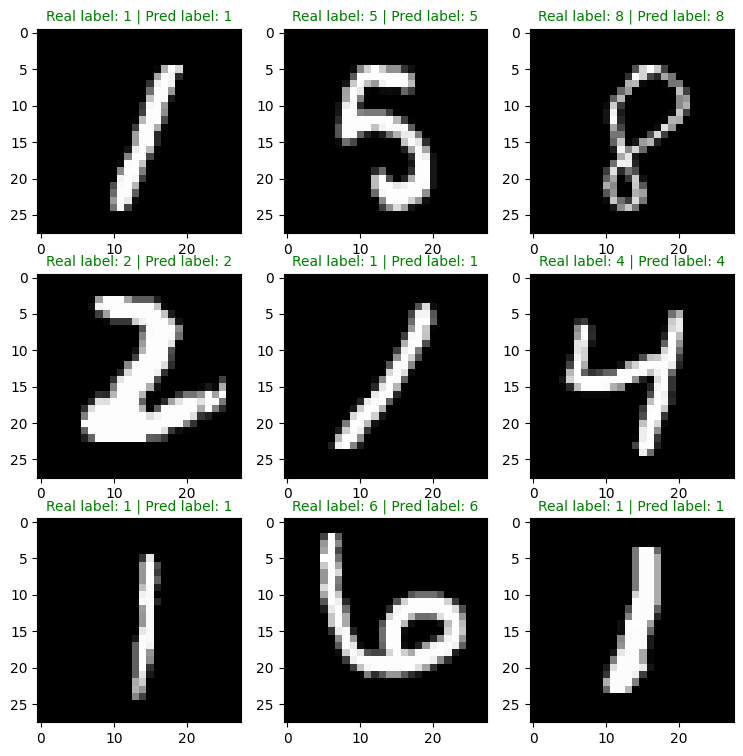

In [92]:
#print(test_data.targets)
import matplotlib.pyplot as plt

#torch.manual_seed(42)
figure=plt.figure(figsize=(9,9))
rows=3
columns=3
for row in range(rows):
  for column in range(columns):
    rd_index=torch.randint(0, len(test_data)-1, size=[1]).item()
    plt.subplot(rows, columns, (row*rows)+column+1)
    plt.imshow(test_data.data[rd_index], cmap="gray")
    text_title=f"Real label: {test_data.targets[rd_index].item()} | Pred label: {pred_labels[rd_index].item()}"
    if test_data.targets[rd_index] == pred_labels[rd_index]:
      plt.title(text_title, fontsize=10, c="g")
    else:
      plt.title(text_title, fontsize=10, c="r")

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [93]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


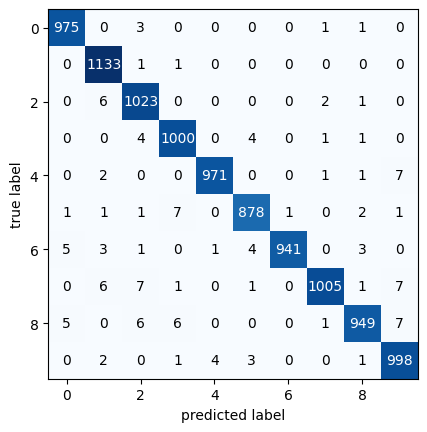

In [99]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(num_classes=len(test_data.classes), task='multiclass')

confusion_matrix=confmat(torch.stack(pred_labels), test_data.targets)
#print(confusion_matrix)

fig, ax=plot_confusion_matrix(confusion_matrix.numpy())
plt.show()

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [116]:
random_tensor=torch.rand(size=(1,3,64,64))
#print(random_tensor.shape)
kernel_size=4
stride=2
padding=4
layer=nn.Conv2d(in_channels=3,out_channels=10, kernel_size=kernel_size, stride=stride, padding=padding)
pred=layer(random_tensor)
print(pred.shape)

torch.Size([1, 10, 35, 35])


[(W−K+2P)/S]+1.

W is the input volume - in your case 128
K is the Kernel size - in your case 5
P is the padding - in your case 0 i believe
S is the stride - which you have not provided.

In [117]:
((64-kernel_size+2*padding)/stride)+1

35.0

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?